In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve,auc

In [2]:
Credit_default_train = pd.read_csv('train.csv')

In [3]:
Credit_default_train.shape

(45528, 19)

In [4]:
Credit_default_train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
Credit_default_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
Credit_default_train.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [7]:
cols = Credit_default_train.columns 

for i in cols:
    if i not in ('customer_id','name'):
        print("Column Name:",i)
        print(Credit_default_train[i].value_counts())
        print("="*50)

Column Name: age
40    1455
55    1448
36    1420
23    1411
35    1410
37    1409
49    1408
26    1399
48    1396
27    1395
29    1395
53    1385
45    1385
30    1384
54    1383
32    1380
50    1377
43    1375
31    1373
25    1373
51    1371
24    1369
28    1368
46    1364
41    1362
44    1356
34    1355
42    1350
39    1349
52    1345
33    1339
38    1325
47    1314
Name: age, dtype: int64
Column Name: gender
F      29957
M      15570
XNA        1
Name: gender, dtype: int64
Column Name: owns_car
N    29743
Y    15238
Name: owns_car, dtype: int64
Column Name: owns_house
Y    31642
N    13886
Name: owns_house, dtype: int64
Column Name: no_of_children
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: no_of_children, dtype: int64
Column Name: net_yearly_income
174102.44    2
228141.82    2
130685.66    2
136189.92    2
128915.00    2
            ..
214377.30    1
80810.88     1
194300.23    1
2

In [8]:
Credit_default_train[Credit_default_train['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [9]:
Credit_default_train['gender'].mask(Credit_default_train['gender'] == 'XNA', 'F', inplace=True)

In [10]:
Credit_default_train['gender'].value_counts()

F    29958
M    15570
Name: gender, dtype: int64

In [11]:
#Credit_default_train[Credit_default_train['no_of_years_employed'] == 1000]

In [12]:
'''Credit_default_train.drop(['customer_id', 'name'], axis=1, inplace=True)
Credit_default_train.head()'''

"Credit_default_train.drop(['customer_id', 'name'], axis=1, inplace=True)\nCredit_default_train.head()"

In [13]:
'''from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()

# get categorical columns
cat_cols = Credit_default_train.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols:
        Credit_default_train[i] = lm.fit_transform(Credit_default_train[i])
    
Credit_default_train.head(10)'''

"from sklearn.preprocessing import LabelEncoder\nlm = LabelEncoder()\n\n# get categorical columns\ncat_cols = Credit_default_train.select_dtypes(include=['object']).columns\n\n# encode labels for categorical columns\nfor i in cat_cols:\n        Credit_default_train[i] = lm.fit_transform(Credit_default_train[i])\n    \nCredit_default_train.head(10)"

In [14]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [15]:
Credit_default_train['no_of_children'].fillna(Credit_default_train['no_of_children'].mode()[0], inplace=True)

In [16]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [17]:
Credit_default_train['total_family_members'].fillna(Credit_default_train['total_family_members'].mode()[0], inplace=True)

In [18]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members         0
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [19]:
Credit_default_train['migrant_worker'].fillna(Credit_default_train['migrant_worker'].mode()[0], inplace=True)

In [20]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [21]:
Credit_default_train['owns_car'].fillna(Credit_default_train['owns_car'].mode()[0], inplace=True)

In [22]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [23]:
#Credit_default_train.isna().sum()

In [24]:
#print('Count',Credit_default_train[Credit_default_train['yearly_debt_payments'] > 200]['credit_card_default'].count())

In [25]:
#Credit_default_train['migrant_worker'].fillna(Credit_default_train['migrant_worker'].mode()[0], inplace=True)

In [26]:
yearDebt_credit = Credit_default_train.groupby(by='credit_card_default')['yearly_debt_payments'].median()
yearDebt_credit

credit_card_default
0    29076.84
1    29133.40
Name: yearly_debt_payments, dtype: float64

In [27]:
for i in yearDebt_credit.index:
    Credit_default_train['yearly_debt_payments'] = np.where((Credit_default_train['yearly_debt_payments'].isna()) & (Credit_default_train['credit_card_default'] == i), yearDebt_credit[i],Credit_default_train['yearly_debt_payments'])

In [28]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [29]:
Cred_score_default = Credit_default_train.groupby(by='credit_card_default')['credit_score'].median()
Cred_score_default

credit_card_default
0    799.0
1    599.0
Name: credit_score, dtype: float64

In [30]:
for i in Cred_score_default.index:
    Credit_default_train['credit_score'] = np.where((Credit_default_train['credit_score'].isna()) & (Credit_default_train['credit_card_default'] == i), yearDebt_credit[i],Credit_default_train['credit_score'])

In [31]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 0
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [32]:
Credit_default_train['no_of_years_employed'] = Credit_default_train['no_of_days_employed'].apply(lambda x:x//365) 

In [33]:
Credit_default_train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 0
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
no_of_years_employed       463
dtype: int64

In [34]:
Credit_default_train.drop(['no_of_days_employed'],  axis = 1,inplace = True)

In [35]:
Credit_default_train['no_of_years_employed'].median()

6.0

In [36]:
Credit_default_train['no_of_years_employed'].fillna(Credit_default_train['no_of_years_employed'].median(), inplace=True)

In [37]:
Credit_default_train.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
no_of_years_employed       0
dtype: int64

In [38]:
Credit_default_train['no_of_years_employed'].dtypes

dtype('float64')

In [39]:
#Credit_default_train['no_of_years_employed']=pd.to_numeric(Credit_default_train['no_of_years_employed'])

In [40]:
#Credit_default_train['no_of_years_employed'].value_counts()

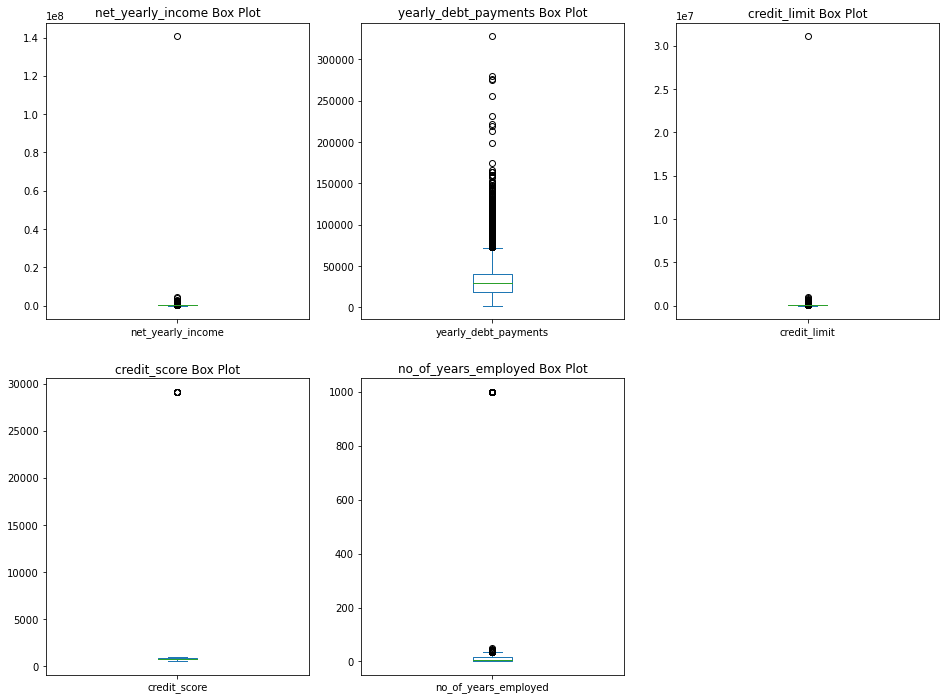

In [41]:
plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
Credit_default_train['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
Credit_default_train['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,3)
Credit_default_train['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,4)
Credit_default_train['credit_score'].plot.box()
plt.title('credit_score Box Plot')

plt.subplot(2,3,5)
Credit_default_train['no_of_years_employed'].plot.box()
plt.title('no_of_years_employed Box Plot')
plt.show()


<AxesSubplot:>

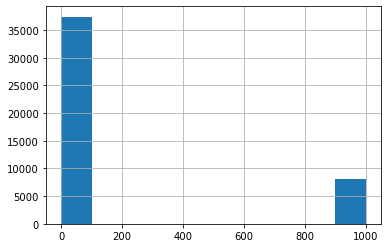

In [42]:
Credit_default_train['no_of_years_employed'].hist()

In [43]:
Credit_default_train['no_of_years_employed'] = Credit_default_train['no_of_years_employed'].replace(1000,6)

<AxesSubplot:>

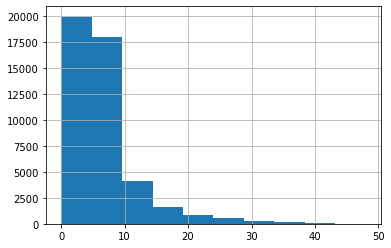

In [44]:
Credit_default_train['no_of_years_employed'].hist()

<AxesSubplot:>

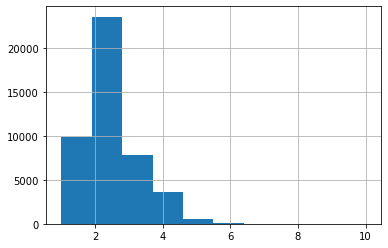

In [45]:
Credit_default_train['total_family_members'].hist()

In [46]:
Credit_default_train['credit_score'].value_counts()

670.00      186
660.00      183
684.00      176
682.00      175
651.00      175
           ... 
500.00       11
623.00       11
529.00       10
29076.84      7
29133.40      1
Name: credit_score, Length: 452, dtype: int64

In [47]:
Credit_default_train[Credit_default_train['credit_score'] > 1000]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,no_of_years_employed
2428,CST_158226,Cable,35,M,N,N,0.0,123818.30,Drivers,2.0,0.0,29352.74,31033.98,62,29076.84,0,0,0,1.0
4352,CST_165659,Menon,27,F,Y,Y,0.0,199174.42,Laborers,2.0,0.0,15608.86,35796.50,68,29076.84,0,0,0,5.0
7384,CST_124436,Gavin Jones,50,M,N,N,0.0,332714.21,Sales staff,1.0,0.0,32973.57,52213.67,62,29076.84,0,0,0,2.0
16180,CST_119729,Lisa Baertlein,24,F,N,Y,0.0,244882.10,Unknown,1.0,0.0,60867.31,63574.88,73,29133.40,1,1,1,1.0
18873,CST_133555,Selam,42,M,Y,Y,0.0,228386.12,Laborers,2.0,1.0,34579.76,64087.72,33,29076.84,0,0,0,3.0
19951,CST_118114,Subhadip Sircar,32,F,N,Y,0.0,146287.81,Unknown,2.0,0.0,28426.08,49628.48,48,29076.84,0,0,0,5.0
29076,CST_143867,Sarah,50,F,N,Y,0.0,220868.01,Unknown,1.0,0.0,8616.70,69047.56,30,29076.84,0,0,0,6.0
35736,CST_125991,Qing,35,F,N,N,2.0,227682.89,Unknown,4.0,0.0,42300.34,37956.84,46,29076.84,0,0,0,11.0


In [48]:
Credit_default_train['credit_score'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250      704.0
0.500      786.0
0.750      867.0
0.990      946.0
0.998      949.0
1.000    29133.4
Name: credit_score, dtype: float64

In [49]:
Credit_default_train[Credit_default_train['credit_score']>Credit_default_train['credit_score'].quantile(0.998)]


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,no_of_years_employed
2428,CST_158226,Cable,35,M,N,N,0.0,123818.30,Drivers,2.0,0.0,29352.74,31033.98,62,29076.84,0,0,0,1.0
4352,CST_165659,Menon,27,F,Y,Y,0.0,199174.42,Laborers,2.0,0.0,15608.86,35796.50,68,29076.84,0,0,0,5.0
7384,CST_124436,Gavin Jones,50,M,N,N,0.0,332714.21,Sales staff,1.0,0.0,32973.57,52213.67,62,29076.84,0,0,0,2.0
16180,CST_119729,Lisa Baertlein,24,F,N,Y,0.0,244882.10,Unknown,1.0,0.0,60867.31,63574.88,73,29133.40,1,1,1,1.0
18873,CST_133555,Selam,42,M,Y,Y,0.0,228386.12,Laborers,2.0,1.0,34579.76,64087.72,33,29076.84,0,0,0,3.0
19951,CST_118114,Subhadip Sircar,32,F,N,Y,0.0,146287.81,Unknown,2.0,0.0,28426.08,49628.48,48,29076.84,0,0,0,5.0
29076,CST_143867,Sarah,50,F,N,Y,0.0,220868.01,Unknown,1.0,0.0,8616.70,69047.56,30,29076.84,0,0,0,6.0
35736,CST_125991,Qing,35,F,N,N,2.0,227682.89,Unknown,4.0,0.0,42300.34,37956.84,46,29076.84,0,0,0,11.0


In [50]:
Credit_default_train=Credit_default_train[Credit_default_train['credit_score']<Credit_default_train['credit_score'].quantile(0.998)]

Text(0.5, 1.0, 'credit_score Box Plot')

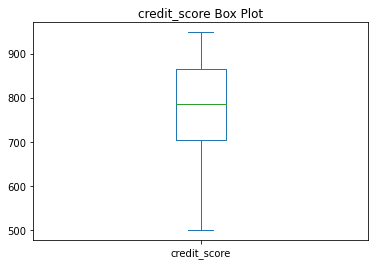

In [51]:
Credit_default_train['credit_score'].plot.box()
plt.title('credit_score Box Plot')

In [52]:
Credit_default_train['yearly_debt_payments'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250     19245.7400
0.500     29076.8400
0.750     40542.1275
0.990     84366.1165
0.998    116044.3532
1.000    328112.8600
Name: yearly_debt_payments, dtype: float64

In [53]:
Credit_default_train[Credit_default_train['yearly_debt_payments']>Credit_default_train['yearly_debt_payments'].quantile(0.998)]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,no_of_years_employed
595,CST_127443,Jane Wardell,29,M,N,N,0.0,808688.34,Managers,2.0,0.0,276512.94,219035.36,65,841.0,0,0,0,6.0
673,CST_144511,Dinesh,33,F,Y,N,0.0,254426.28,Unknown,2.0,0.0,157115.86,48399.70,81,778.0,0,0,0,6.0
1336,CST_144147,Leila,34,F,N,Y,1.0,576455.38,Core staff,3.0,0.0,160536.46,103710.75,18,909.0,0,0,0,1.0
1991,CST_109924,Jonathan Spicer,30,F,Y,N,0.0,278735.22,Unknown,2.0,0.0,126442.69,70336.93,69,905.0,0,0,0,6.0
3389,CST_123729,Scott Haggett,45,M,Y,N,0.0,701918.86,IT staff,2.0,0.0,274939.59,150349.79,48,697.0,0,0,0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43208,CST_140755,Kevin,52,M,Y,Y,1.0,527409.99,Unknown,3.0,0.0,175158.07,128341.42,70,683.0,0,0,0,2.0
43667,CST_160485,Stempel,27,F,N,Y,0.0,543067.20,Managers,2.0,0.0,145013.23,140918.81,21,716.0,0,0,0,15.0
44084,CST_118822,Dan Levine,54,F,Y,N,0.0,428133.20,Managers,1.0,0.0,124385.71,135199.79,30,667.0,0,0,0,1.0
44109,CST_107929,Michael Holden,47,M,Y,N,1.0,193739.55,Unknown,3.0,0.0,121016.74,62989.15,59,947.0,0,0,0,0.0


In [54]:
Credit_default_train=Credit_default_train[Credit_default_train['yearly_debt_payments']<Credit_default_train['yearly_debt_payments'].quantile(0.998)]

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearly_debt_payments', ylabel='Density'>

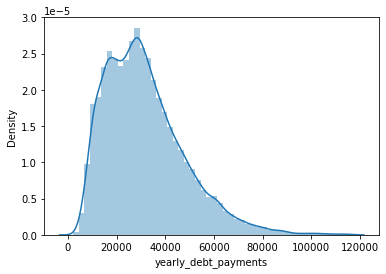

In [55]:
sns.distplot(Credit_default_train['yearly_debt_payments'])

In [56]:
Credit_default_train['net_yearly_income'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250    1.262486e+05
0.500    1.715860e+05
0.750    2.401986e+05
0.990    5.741523e+05
0.998    8.768267e+05
1.000    1.407590e+08
Name: net_yearly_income, dtype: float64

In [57]:
Credit_default_train[Credit_default_train['net_yearly_income']>Credit_default_train['net_yearly_income'].quantile(0.998)]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,no_of_years_employed
335,CST_117197,Alison Griswold,37,M,Y,Y,0.0,879553.84,Managers,1.0,0.0,52839.41,194618.06,74,503.0,1,0,1,6.0
1247,CST_135358,Olivia,36,M,Y,N,0.0,1013421.02,Managers,2.0,0.0,75840.29,157938.53,1,840.0,0,0,0,0.0
1779,CST_148941,Damouni,35,F,N,N,0.0,978559.07,Accountants,1.0,0.0,47607.58,215405.86,75,927.0,0,0,0,6.0
2267,CST_160056,Stempel,30,F,N,N,0.0,955727.98,Accountants,2.0,0.0,75489.03,221929.39,33,800.0,0,0,0,10.0
2594,CST_101929,Peter Lauria,37,F,Y,Y,0.0,878769.28,Medicine staff,2.0,0.0,25017.58,100363.85,81,625.0,1,1,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44446,CST_165896,Kim,26,F,Y,N,0.0,977927.55,Sales staff,1.0,0.0,83358.84,251670.25,34,944.0,0,0,0,11.0
44633,CST_157471,Ferreira-Marques,40,F,Y,N,0.0,4433825.02,Unknown,2.0,1.0,78971.72,548115.45,19,837.0,0,0,0,2.0
45116,CST_125599,"""John ODonnell""",23,M,N,Y,0.0,1012150.16,Managers,2.0,0.0,83782.01,267512.16,4,714.0,0,0,0,8.0
45158,CST_147033,Kihara,33,M,Y,N,2.0,984019.98,Unknown,4.0,1.0,72571.25,315461.88,29,789.0,0,0,0,6.0


In [58]:
Credit_default_train=Credit_default_train[Credit_default_train['net_yearly_income']<Credit_default_train['net_yearly_income'].quantile(0.998)]

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='net_yearly_income', ylabel='Density'>

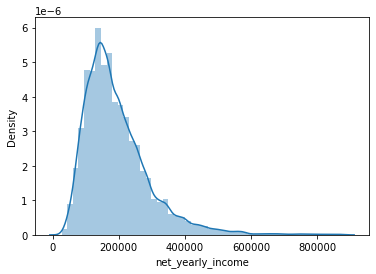

In [59]:
sns.distplot(Credit_default_train['net_yearly_income'])

In [60]:
Credit_default_train.shape

(45192, 19)

## MODELLING

In [61]:
Credit_default_train.drop(['customer_id', 'name'], axis=1, inplace=True)
Credit_default_train.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,no_of_years_employed
0,46,F,N,Y,0.0,107934.04,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,1.0
1,29,M,N,Y,0.0,109862.62,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,7.0
2,37,M,N,Y,0.0,230153.17,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,0.0
3,39,F,N,Y,0.0,122325.82,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,32.0
4,46,M,Y,Y,0.0,387286.00,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,3.0


In [62]:
le = LabelEncoder()

# get categorical columns
cat_cols = Credit_default_train.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols:
    Credit_default_train[i] = le.fit_transform(Credit_default_train[i])
    
Credit_default_train.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,no_of_years_employed
0,46,0,0,1,0.0,107934.04,17,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,1.0
1,29,1,0,1,0.0,109862.62,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,7.0
2,37,1,0,1,0.0,230153.17,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,0.0
3,39,0,0,1,0.0,122325.82,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,32.0
4,46,1,1,1,0.0,387286.00,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,3.0


In [63]:
Input = Credit_default_train.drop('credit_card_default', axis =1)

In [64]:
Input.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,no_of_years_employed
0,46,0,0,1,0.0,107934.04,17,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1.0
1,29,1,0,1,0.0,109862.62,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0,7.0
2,37,1,0,1,0.0,230153.17,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0.0
3,39,0,0,1,0.0,122325.82,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0,32.0
4,46,1,1,1,0.0,387286.00,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0,3.0


In [65]:
Output = Credit_default_train["credit_card_default"]

In [66]:
Output.head()

0    1
1    0
2    0
3    0
4    0
Name: credit_card_default, dtype: int64

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(Input,Output,test_size = 0.2, random_state = 123)

In [68]:
X_train.shape

(36153, 16)

In [69]:
X_test.shape

(9039, 16)

In [70]:
Y_train.shape

(36153,)

In [71]:
Y_test.shape

(9039,)

## Logistic Regression 

In [72]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
model_prediction = LR.predict(X_test)

C:\Users\kirti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
model_prediction = LR.predict(X_test)

C:\Users\kirti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
accuracy_score(Y_test,model_prediction)

0.9555260537670096

In [75]:
print(classification_report(Y_test,model_prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8297
           1       0.78      0.64      0.70       742

    accuracy                           0.96      9039
   macro avg       0.87      0.81      0.84      9039
weighted avg       0.95      0.96      0.95      9039



In [76]:
pred = pd.DataFrame({"Actual Value":Y_test,"Predicted Value":model_prediction})
pred.tail()

,Actual Value,Predicted Value
6890,0,0
19730,0,0
14391,0,0
16609,0,0
22064,0,0


In [77]:
conf_matrix = confusion_matrix(Y_test,model_prediction)
conf_matrix

array([[8164,  133],
       [ 269,  473]], dtype=int64)

[]

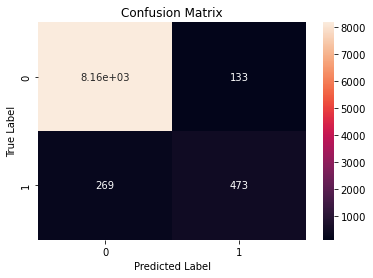

In [78]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

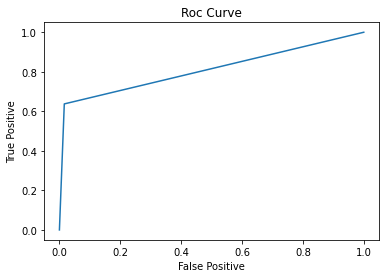

In [79]:
fpr,tpr, threshold = roc_curve(Y_test,model_prediction)
auc_model = auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle = "-")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Roc Curve")
plt.show()

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test,model_prediction))



roc_auc_score for Logistic Regression:  0.8107182084779125


In [81]:
print(pred)

       Actual Value  Predicted Value
16832             0                0
27671             0                0
29327             0                0
8269              0                0
20906             0                0
...             ...              ...
6890              0                0
19730             0                0
14391             0                0
16609             0                0
22064             0                0

[9039 rows x 2 columns]


In [82]:
prediction = LR.predict(X_train)

In [83]:
print(prediction)

[0 0 0 ... 0 0 0]


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [85]:
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(Y_test, y_pred)))


   Accuracy: 0.9795331341962606


In [86]:
!pip install catboost

In [87]:
from catboost import CatBoostClassifier, Pool, cv

In [88]:
import catboost as cb

In [89]:
train_dataset = cb.Pool(X_train,Y_train)
test_dataset = cb.Pool(X_test,Y_test)

In [90]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')

In [91]:
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [50, 100, 150]}

In [92]:
model.grid_search(grid,train_dataset)

0:	learn: 0.9782518	test: 0.9782879	best: 0.9782879 (0)	total: 1.46s	remaining: 1m 11s
1:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.48s	remaining: 35.6s
2:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.49s	remaining: 23.4s
3:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.5s	remaining: 17.2s
4:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.51s	remaining: 13.6s
5:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.51s	remaining: 11.1s
6:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.52s	remaining: 9.35s
7:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.53s	remaining: 8.03s
8:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.54s	remaining: 7.03s
9:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.55s	remaining: 6.21s
10:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 1.56s	remaining: 5.53s
11:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 

46:	learn: 0.9810871	test: 0.9792560	best: 0.9793943 (28)	total: 437ms	remaining: 27.9ms
47:	learn: 0.9810871	test: 0.9792560	best: 0.9793943 (28)	total: 443ms	remaining: 18.4ms
48:	learn: 0.9810871	test: 0.9792560	best: 0.9793943 (28)	total: 448ms	remaining: 9.14ms
49:	learn: 0.9811216	test: 0.9793943	best: 0.9793943 (28)	total: 462ms	remaining: 0us

bestTest = 0.9793942747
bestIteration = 28

1:	loss: 0.9793943	best: 0.9793943 (1)	total: 3.46s	remaining: 1m 29s
0:	learn: 0.9782518	test: 0.9782879	best: 0.9782879 (0)	total: 22.6ms	remaining: 1.1s
1:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 30.5ms	remaining: 733ms
2:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 38ms	remaining: 596ms
3:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 44ms	remaining: 506ms
4:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 50.5ms	remaining: 454ms
5:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 56.3ms	remaining: 413ms
6:	learn: 0.980

44:	learn: 0.9808796	test: 0.9791177	best: 0.9792560 (1)	total: 348ms	remaining: 38.7ms
45:	learn: 0.9808796	test: 0.9791177	best: 0.9792560 (1)	total: 355ms	remaining: 30.9ms
46:	learn: 0.9809488	test: 0.9791177	best: 0.9792560 (1)	total: 361ms	remaining: 23ms
47:	learn: 0.9809488	test: 0.9791177	best: 0.9792560 (1)	total: 368ms	remaining: 15.3ms
48:	learn: 0.9809488	test: 0.9791177	best: 0.9792560 (1)	total: 375ms	remaining: 7.64ms
49:	learn: 0.9809833	test: 0.9791177	best: 0.9792560 (1)	total: 381ms	remaining: 0us

bestTest = 0.9792559812
bestIteration = 1

3:	loss: 0.9792560	best: 0.9793943 (1)	total: 4.24s	remaining: 53.1s
0:	learn: 0.9782518	test: 0.9782879	best: 0.9782879 (0)	total: 7.85ms	remaining: 385ms
1:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 14.4ms	remaining: 345ms
2:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 21.7ms	remaining: 339ms
3:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 28.4ms	remaining: 326ms
4:	learn: 0.9807

4:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 45ms	remaining: 856ms
5:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 51.4ms	remaining: 805ms
6:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 60.8ms	remaining: 808ms
7:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 67.2ms	remaining: 773ms
8:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 76ms	remaining: 768ms
9:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 83.2ms	remaining: 749ms
10:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 90.3ms	remaining: 730ms
11:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 96.8ms	remaining: 710ms
12:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 104ms	remaining: 693ms
13:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 110ms	remaining: 673ms
14:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 116ms	remaining: 659ms
15:	learn: 0.9807067	test: 0.9792560	best: 0.

5:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 49.2ms	remaining: 770ms
6:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 55.8ms	remaining: 742ms
7:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 62.1ms	remaining: 714ms
8:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 68.2ms	remaining: 689ms
9:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 75.6ms	remaining: 680ms
10:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 81.9ms	remaining: 663ms
11:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 89ms	remaining: 652ms
12:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 95ms	remaining: 636ms
13:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 101ms	remaining: 621ms
14:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 108ms	remaining: 613ms
15:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 114ms	remaining: 600ms
16:	learn: 0.9807413	test: 0.9792560	best: 0

9:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 120ms	remaining: 1.08s
10:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 128ms	remaining: 1.03s
11:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 134ms	remaining: 983ms
12:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 140ms	remaining: 937ms
13:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 147ms	remaining: 902ms
14:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 153ms	remaining: 869ms
15:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 159ms	remaining: 837ms
16:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 166ms	remaining: 810ms
17:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 172ms	remaining: 783ms
18:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 179ms	remaining: 762ms
19:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 186ms	remaining: 743ms
20:	learn: 0.9807067	test: 0.9792560	best: 0

11:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 90.5ms	remaining: 664ms
12:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 96.9ms	remaining: 648ms
13:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 103ms	remaining: 635ms
14:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 110ms	remaining: 624ms
15:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 116ms	remaining: 609ms
16:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 122ms	remaining: 596ms
17:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 128ms	remaining: 582ms
18:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 134ms	remaining: 572ms
19:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 141ms	remaining: 563ms
20:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 148ms	remaining: 555ms
21:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 155ms	remaining: 549ms
22:	learn: 0.9807413	test: 0.9792560	best

22:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 151ms	remaining: 504ms
23:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 158ms	remaining: 500ms
24:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 165ms	remaining: 495ms
25:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 172ms	remaining: 489ms
26:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 178ms	remaining: 481ms
27:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 184ms	remaining: 472ms
28:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 190ms	remaining: 465ms
29:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 196ms	remaining: 458ms
30:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 202ms	remaining: 450ms
31:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 209ms	remaining: 444ms
32:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 215ms	remaining: 436ms
33:	learn: 0.9807067	test: 0.9792560	best: 

18:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 181ms	remaining: 773ms
19:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 189ms	remaining: 754ms
20:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 200ms	remaining: 751ms
21:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 210ms	remaining: 743ms
22:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 217ms	remaining: 727ms
23:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 236ms	remaining: 746ms
24:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 244ms	remaining: 731ms
25:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 251ms	remaining: 713ms
26:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 259ms	remaining: 699ms
27:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 268ms	remaining: 689ms
28:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 274ms	remaining: 672ms
29:	learn: 0.9807413	test: 0.9792560	best: 

35:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 255ms	remaining: 807ms
36:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 261ms	remaining: 798ms
37:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 270ms	remaining: 796ms
38:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 277ms	remaining: 789ms
39:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 284ms	remaining: 781ms
40:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 290ms	remaining: 771ms
41:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 298ms	remaining: 766ms
42:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 304ms	remaining: 756ms
43:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 311ms	remaining: 749ms
44:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 317ms	remaining: 739ms
45:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 323ms	remaining: 730ms
46:	learn: 0.9807413	test: 0.9792560	best: 

148:	learn: 0.9809488	test: 0.9792560	best: 0.9792560 (1)	total: 1.18s	remaining: 7.93ms
149:	learn: 0.9809833	test: 0.9792560	best: 0.9792560 (1)	total: 1.19s	remaining: 0us

bestTest = 0.9792559812
bestIteration = 1

12:	loss: 0.9792560	best: 0.9795326 (9)	total: 11s	remaining: 34.6s
0:	learn: 0.9782518	test: 0.9782879	best: 0.9782879 (0)	total: 6.83ms	remaining: 1.02s
1:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 13.1ms	remaining: 969ms
2:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 18.9ms	remaining: 928ms
3:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 25.3ms	remaining: 922ms
4:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 32.6ms	remaining: 944ms
5:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 39ms	remaining: 935ms
6:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 46ms	remaining: 940ms
7:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 51.9ms	remaining: 921ms
8:	learn: 0.9807413	t

107:	learn: 0.9823318	test: 0.9793943	best: 0.9793943 (28)	total: 710ms	remaining: 276ms
108:	learn: 0.9824355	test: 0.9793943	best: 0.9793943 (28)	total: 716ms	remaining: 269ms
109:	learn: 0.9824009	test: 0.9792560	best: 0.9793943 (28)	total: 722ms	remaining: 262ms
110:	learn: 0.9824009	test: 0.9792560	best: 0.9793943 (28)	total: 727ms	remaining: 256ms
111:	learn: 0.9824355	test: 0.9792560	best: 0.9793943 (28)	total: 733ms	remaining: 249ms
112:	learn: 0.9824701	test: 0.9791177	best: 0.9793943 (28)	total: 739ms	remaining: 242ms
113:	learn: 0.9825047	test: 0.9791177	best: 0.9793943 (28)	total: 744ms	remaining: 235ms
114:	learn: 0.9824701	test: 0.9792560	best: 0.9793943 (28)	total: 750ms	remaining: 228ms
115:	learn: 0.9825738	test: 0.9792560	best: 0.9793943 (28)	total: 756ms	remaining: 222ms
116:	learn: 0.9826084	test: 0.9792560	best: 0.9793943 (28)	total: 762ms	remaining: 215ms
117:	learn: 0.9826430	test: 0.9792560	best: 0.9793943 (28)	total: 769ms	remaining: 208ms
118:	learn: 0.9826084

78:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 490ms	remaining: 440ms
79:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 495ms	remaining: 433ms
80:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 502ms	remaining: 428ms
81:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 508ms	remaining: 421ms
82:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 514ms	remaining: 415ms
83:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 520ms	remaining: 409ms
84:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 526ms	remaining: 402ms
85:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 532ms	remaining: 396ms
86:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 539ms	remaining: 390ms
87:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 544ms	remaining: 384ms
88:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (1)	total: 551ms	remaining: 377ms
89:	learn: 0.9807413	test: 0.9792560	best: 

43:	learn: 0.9809142	test: 0.9791177	best: 0.9792560 (1)	total: 279ms	remaining: 672ms
44:	learn: 0.9808796	test: 0.9791177	best: 0.9792560 (1)	total: 285ms	remaining: 666ms
45:	learn: 0.9808796	test: 0.9791177	best: 0.9792560 (1)	total: 291ms	remaining: 658ms
46:	learn: 0.9809488	test: 0.9791177	best: 0.9792560 (1)	total: 299ms	remaining: 656ms
47:	learn: 0.9809488	test: 0.9791177	best: 0.9792560 (1)	total: 308ms	remaining: 654ms
48:	learn: 0.9809488	test: 0.9791177	best: 0.9792560 (1)	total: 314ms	remaining: 647ms
49:	learn: 0.9809833	test: 0.9791177	best: 0.9792560 (1)	total: 320ms	remaining: 640ms
50:	learn: 0.9810871	test: 0.9791177	best: 0.9792560 (1)	total: 326ms	remaining: 633ms
51:	learn: 0.9810871	test: 0.9791177	best: 0.9792560 (1)	total: 332ms	remaining: 626ms
52:	learn: 0.9811562	test: 0.9791177	best: 0.9792560 (1)	total: 338ms	remaining: 618ms
53:	learn: 0.9811562	test: 0.9791177	best: 0.9792560 (1)	total: 344ms	remaining: 611ms
54:	learn: 0.9811216	test: 0.9791177	best: 

10:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 75.9ms	remaining: 959ms
11:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 81.8ms	remaining: 940ms
12:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 87.8ms	remaining: 925ms
13:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 94.7ms	remaining: 920ms
14:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 101ms	remaining: 909ms
15:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 106ms	remaining: 891ms
16:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 112ms	remaining: 880ms
17:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 118ms	remaining: 867ms
18:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 126ms	remaining: 871ms
19:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 133ms	remaining: 864ms
20:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (1)	total: 139ms	remaining: 855ms
21:	learn: 0.9807067	test: 0.9792560	be

122:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 799ms	remaining: 175ms
123:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 805ms	remaining: 169ms
124:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 812ms	remaining: 162ms
125:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 819ms	remaining: 156ms
126:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 824ms	remaining: 149ms
127:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 830ms	remaining: 143ms
128:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 837ms	remaining: 136ms
129:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 843ms	remaining: 130ms
130:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 849ms	remaining: 123ms
131:	learn: 0.9808450	test: 0.9791177	best: 0.9792560 (1)	total: 855ms	remaining: 117ms
132:	learn: 0.9808105	test: 0.9791177	best: 0.9792560 (1)	total: 861ms	remaining: 110ms
133:	learn: 0.9808105	test: 0.97

83:	learn: 0.9812254	test: 0.9792560	best: 0.9792560 (1)	total: 700ms	remaining: 550ms
84:	learn: 0.9812254	test: 0.9792560	best: 0.9792560 (1)	total: 706ms	remaining: 540ms
85:	learn: 0.9812599	test: 0.9792560	best: 0.9792560 (1)	total: 712ms	remaining: 530ms
86:	learn: 0.9811908	test: 0.9791177	best: 0.9792560 (1)	total: 719ms	remaining: 520ms
87:	learn: 0.9812254	test: 0.9791177	best: 0.9792560 (1)	total: 724ms	remaining: 510ms
88:	learn: 0.9811562	test: 0.9791177	best: 0.9792560 (1)	total: 730ms	remaining: 500ms
89:	learn: 0.9811216	test: 0.9791177	best: 0.9792560 (1)	total: 738ms	remaining: 492ms
90:	learn: 0.9811562	test: 0.9789794	best: 0.9792560 (1)	total: 745ms	remaining: 483ms
91:	learn: 0.9811216	test: 0.9789794	best: 0.9792560 (1)	total: 756ms	remaining: 476ms
92:	learn: 0.9810871	test: 0.9789794	best: 0.9792560 (1)	total: 764ms	remaining: 468ms
93:	learn: 0.9810871	test: 0.9789794	best: 0.9792560 (1)	total: 772ms	remaining: 460ms
94:	learn: 0.9811908	test: 0.9789794	best: 

38:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 323ms	remaining: 91.2ms
39:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 331ms	remaining: 82.7ms
40:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 340ms	remaining: 74.6ms
41:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 350ms	remaining: 66.7ms
42:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 360ms	remaining: 58.7ms
43:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 369ms	remaining: 50.3ms
44:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 377ms	remaining: 41.9ms
45:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 386ms	remaining: 33.6ms
46:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 394ms	remaining: 25.2ms
47:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 403ms	remaining: 16.8ms
48:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 411ms	remaining: 8.39ms
49:	learn: 0.9807413	test: 0.979

33:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 360ms	remaining: 169ms
34:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 369ms	remaining: 158ms
35:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 383ms	remaining: 149ms
36:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 392ms	remaining: 138ms
37:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 401ms	remaining: 127ms
38:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 410ms	remaining: 116ms
39:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 418ms	remaining: 104ms
40:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 427ms	remaining: 93.7ms
41:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 435ms	remaining: 82.8ms
42:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 442ms	remaining: 71.9ms
43:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 450ms	remaining: 61.3ms
44:	learn: 0.9807067	test: 0.9792560	be

39:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 332ms	remaining: 83ms
40:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 340ms	remaining: 74.6ms
41:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 349ms	remaining: 66.4ms
42:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 357ms	remaining: 58.1ms
43:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 365ms	remaining: 49.8ms
44:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 373ms	remaining: 41.5ms
45:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 382ms	remaining: 33.2ms
46:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 390ms	remaining: 24.9ms
47:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 399ms	remaining: 16.6ms
48:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 409ms	remaining: 8.35ms
49:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 420ms	remaining: 0us

bestTest = 0.9792559812
bestIteratio

48:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 432ms	remaining: 450ms
49:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 439ms	remaining: 439ms
50:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 449ms	remaining: 431ms
51:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 459ms	remaining: 424ms
52:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 467ms	remaining: 414ms
53:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 475ms	remaining: 404ms
54:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 482ms	remaining: 395ms
55:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 490ms	remaining: 385ms
56:	learn: 0.9807759	test: 0.9792560	best: 0.9792560 (0)	total: 497ms	remaining: 375ms
57:	learn: 0.9807759	test: 0.9792560	best: 0.9792560 (0)	total: 505ms	remaining: 365ms
58:	learn: 0.9807759	test: 0.9792560	best: 0.9792560 (0)	total: 512ms	remaining: 356ms
59:	learn: 0.9807759	test: 0.9792560	best: 

44:	learn: 0.9816403	test: 0.9796709	best: 0.9796709 (40)	total: 443ms	remaining: 542ms
45:	learn: 0.9816403	test: 0.9796709	best: 0.9796709 (40)	total: 453ms	remaining: 531ms
46:	learn: 0.9817094	test: 0.9798092	best: 0.9798092 (46)	total: 463ms	remaining: 522ms
47:	learn: 0.9817786	test: 0.9798092	best: 0.9798092 (46)	total: 485ms	remaining: 525ms
48:	learn: 0.9817786	test: 0.9798092	best: 0.9798092 (46)	total: 501ms	remaining: 522ms
49:	learn: 0.9818823	test: 0.9796709	best: 0.9798092 (46)	total: 510ms	remaining: 510ms
50:	learn: 0.9818823	test: 0.9796709	best: 0.9798092 (46)	total: 519ms	remaining: 499ms
51:	learn: 0.9818823	test: 0.9796709	best: 0.9798092 (46)	total: 525ms	remaining: 484ms
52:	learn: 0.9820206	test: 0.9796709	best: 0.9798092 (46)	total: 539ms	remaining: 478ms
53:	learn: 0.9820206	test: 0.9798092	best: 0.9798092 (46)	total: 547ms	remaining: 466ms
54:	learn: 0.9822281	test: 0.9798092	best: 0.9798092 (46)	total: 559ms	remaining: 457ms
55:	learn: 0.9822972	test: 0.979

45:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 415ms	remaining: 488ms
46:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 426ms	remaining: 480ms
47:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 465ms	remaining: 504ms
48:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 482ms	remaining: 502ms
49:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 495ms	remaining: 495ms
50:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 526ms	remaining: 505ms
51:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 536ms	remaining: 495ms
52:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 545ms	remaining: 484ms
53:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 554ms	remaining: 472ms
54:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 563ms	remaining: 460ms
55:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 569ms	remaining: 447ms
56:	learn: 0.9807067	test: 0.9792560	best: 

38:	learn: 0.9811908	test: 0.9795326	best: 0.9795326 (38)	total: 381ms	remaining: 596ms
39:	learn: 0.9812254	test: 0.9793943	best: 0.9795326 (38)	total: 390ms	remaining: 585ms
40:	learn: 0.9812254	test: 0.9793943	best: 0.9795326 (38)	total: 397ms	remaining: 572ms
41:	learn: 0.9812599	test: 0.9793943	best: 0.9795326 (38)	total: 405ms	remaining: 560ms
42:	learn: 0.9812599	test: 0.9793943	best: 0.9795326 (38)	total: 413ms	remaining: 548ms
43:	learn: 0.9812254	test: 0.9793943	best: 0.9795326 (38)	total: 422ms	remaining: 537ms
44:	learn: 0.9812945	test: 0.9792560	best: 0.9795326 (38)	total: 431ms	remaining: 527ms
45:	learn: 0.9813291	test: 0.9792560	best: 0.9795326 (38)	total: 443ms	remaining: 521ms
46:	learn: 0.9813637	test: 0.9792560	best: 0.9795326 (38)	total: 452ms	remaining: 510ms
47:	learn: 0.9814328	test: 0.9791177	best: 0.9795326 (38)	total: 461ms	remaining: 499ms
48:	learn: 0.9813982	test: 0.9789794	best: 0.9795326 (38)	total: 470ms	remaining: 489ms
49:	learn: 0.9814674	test: 0.978

53:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 456ms	remaining: 389ms
54:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 465ms	remaining: 380ms
55:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 472ms	remaining: 371ms
56:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 482ms	remaining: 363ms
57:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 489ms	remaining: 354ms
58:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 497ms	remaining: 346ms
59:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 505ms	remaining: 337ms
60:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 514ms	remaining: 328ms
61:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 522ms	remaining: 320ms
62:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 531ms	remaining: 312ms
63:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 539ms	remaining: 303ms
64:	learn: 0.9807067	test: 0.9792560	best: 

66:	learn: 0.9818823	test: 0.9792560	best: 0.9795326 (21)	total: 559ms	remaining: 275ms
67:	learn: 0.9818823	test: 0.9791177	best: 0.9795326 (21)	total: 569ms	remaining: 268ms
68:	learn: 0.9819515	test: 0.9792560	best: 0.9795326 (21)	total: 577ms	remaining: 259ms
69:	learn: 0.9820898	test: 0.9793943	best: 0.9795326 (21)	total: 585ms	remaining: 251ms
70:	learn: 0.9820206	test: 0.9792560	best: 0.9795326 (21)	total: 594ms	remaining: 243ms
71:	learn: 0.9821243	test: 0.9793943	best: 0.9795326 (21)	total: 602ms	remaining: 234ms
72:	learn: 0.9821589	test: 0.9795326	best: 0.9795326 (21)	total: 611ms	remaining: 226ms
73:	learn: 0.9822281	test: 0.9795326	best: 0.9795326 (21)	total: 619ms	remaining: 218ms
74:	learn: 0.9821589	test: 0.9795326	best: 0.9795326 (21)	total: 628ms	remaining: 209ms
75:	learn: 0.9822281	test: 0.9793943	best: 0.9795326 (21)	total: 636ms	remaining: 201ms
76:	learn: 0.9823664	test: 0.9795326	best: 0.9795326 (21)	total: 644ms	remaining: 193ms
77:	learn: 0.9825047	test: 0.979

79:	learn: 0.9808105	test: 0.9792560	best: 0.9792560 (0)	total: 852ms	remaining: 745ms
80:	learn: 0.9808105	test: 0.9792560	best: 0.9792560 (0)	total: 860ms	remaining: 732ms
81:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (81)	total: 868ms	remaining: 720ms
82:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (81)	total: 877ms	remaining: 708ms
83:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (81)	total: 885ms	remaining: 695ms
84:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (81)	total: 893ms	remaining: 683ms
85:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (81)	total: 901ms	remaining: 670ms
86:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (81)	total: 909ms	remaining: 658ms
87:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (81)	total: 916ms	remaining: 645ms
88:	learn: 0.9809142	test: 0.9793943	best: 0.9793943 (81)	total: 924ms	remaining: 633ms
89:	learn: 0.9809833	test: 0.9793943	best: 0.9793943 (81)	total: 932ms	remaining: 621ms
90:	learn: 0.9809833	test: 0.97939

23:	learn: 0.9808105	test: 0.9793943	best: 0.9793943 (21)	total: 241ms	remaining: 1.27s
24:	learn: 0.9808450	test: 0.9793943	best: 0.9793943 (21)	total: 248ms	remaining: 1.24s
25:	learn: 0.9808796	test: 0.9793943	best: 0.9793943 (21)	total: 256ms	remaining: 1.22s
26:	learn: 0.9809488	test: 0.9793943	best: 0.9793943 (21)	total: 263ms	remaining: 1.2s
27:	learn: 0.9810525	test: 0.9791177	best: 0.9793943 (21)	total: 271ms	remaining: 1.18s
28:	learn: 0.9810525	test: 0.9792560	best: 0.9793943 (21)	total: 278ms	remaining: 1.16s
29:	learn: 0.9810525	test: 0.9792560	best: 0.9793943 (21)	total: 287ms	remaining: 1.15s
30:	learn: 0.9810871	test: 0.9791177	best: 0.9793943 (21)	total: 294ms	remaining: 1.13s
31:	learn: 0.9811216	test: 0.9792560	best: 0.9793943 (21)	total: 301ms	remaining: 1.11s
32:	learn: 0.9811216	test: 0.9792560	best: 0.9793943 (21)	total: 309ms	remaining: 1.09s
33:	learn: 0.9811562	test: 0.9792560	best: 0.9793943 (21)	total: 316ms	remaining: 1.08s
34:	learn: 0.9812599	test: 0.9793

134:	learn: 0.9880368	test: 0.9793943	best: 0.9803623 (63)	total: 1.3s	remaining: 144ms
135:	learn: 0.9881751	test: 0.9793943	best: 0.9803623 (63)	total: 1.31s	remaining: 134ms
136:	learn: 0.9881751	test: 0.9793943	best: 0.9803623 (63)	total: 1.31s	remaining: 125ms
137:	learn: 0.9882442	test: 0.9793943	best: 0.9803623 (63)	total: 1.32s	remaining: 115ms
138:	learn: 0.9882442	test: 0.9791177	best: 0.9803623 (63)	total: 1.33s	remaining: 106ms
139:	learn: 0.9882788	test: 0.9791177	best: 0.9803623 (63)	total: 1.36s	remaining: 97ms
140:	learn: 0.9883825	test: 0.9791177	best: 0.9803623 (63)	total: 1.37s	remaining: 87.3ms
141:	learn: 0.9885208	test: 0.9792560	best: 0.9803623 (63)	total: 1.38s	remaining: 77.9ms
142:	learn: 0.9886592	test: 0.9789794	best: 0.9803623 (63)	total: 1.43s	remaining: 69.8ms
143:	learn: 0.9886592	test: 0.9789794	best: 0.9803623 (63)	total: 1.44s	remaining: 59.9ms
144:	learn: 0.9887629	test: 0.9791177	best: 0.9803623 (63)	total: 1.45s	remaining: 49.8ms
145:	learn: 0.9888

91:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 887ms	remaining: 559ms
92:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 901ms	remaining: 552ms
93:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 909ms	remaining: 541ms
94:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 916ms	remaining: 530ms
95:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 924ms	remaining: 520ms
96:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 933ms	remaining: 510ms
97:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 941ms	remaining: 499ms
98:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 949ms	remaining: 489ms
99:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 957ms	remaining: 479ms
100:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 967ms	remaining: 469ms
101:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 976ms	remaining: 459ms
102:	learn: 0.9809142	test: 0.9792560	bes

44:	learn: 0.9812945	test: 0.9792560	best: 0.9795326 (38)	total: 500ms	remaining: 1.17s
45:	learn: 0.9813291	test: 0.9792560	best: 0.9795326 (38)	total: 509ms	remaining: 1.15s
46:	learn: 0.9813637	test: 0.9792560	best: 0.9795326 (38)	total: 517ms	remaining: 1.13s
47:	learn: 0.9814328	test: 0.9791177	best: 0.9795326 (38)	total: 525ms	remaining: 1.12s
48:	learn: 0.9813982	test: 0.9789794	best: 0.9795326 (38)	total: 534ms	remaining: 1.1s
49:	learn: 0.9814674	test: 0.9789794	best: 0.9795326 (38)	total: 542ms	remaining: 1.08s
50:	learn: 0.9815365	test: 0.9789794	best: 0.9795326 (38)	total: 550ms	remaining: 1.07s
51:	learn: 0.9816403	test: 0.9791177	best: 0.9795326 (38)	total: 558ms	remaining: 1.05s
52:	learn: 0.9816403	test: 0.9791177	best: 0.9795326 (38)	total: 567ms	remaining: 1.04s
53:	learn: 0.9816748	test: 0.9791177	best: 0.9795326 (38)	total: 575ms	remaining: 1.02s
54:	learn: 0.9817440	test: 0.9792560	best: 0.9795326 (38)	total: 584ms	remaining: 1.01s
55:	learn: 0.9818132	test: 0.9792


bestTest = 0.9805006223
bestIteration = 126

33:	loss: 0.9805006	best: 0.9805006 (33)	total: 30.9s	remaining: 18.2s
0:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 12.3ms	remaining: 1.84s
1:	learn: 0.9795657	test: 0.9785645	best: 0.9792560 (0)	total: 19.9ms	remaining: 1.47s
2:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 27.1ms	remaining: 1.33s
3:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 33.8ms	remaining: 1.24s
4:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 41.4ms	remaining: 1.2s
5:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 48.7ms	remaining: 1.17s
6:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 55.7ms	remaining: 1.14s
7:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 63ms	remaining: 1.12s
8:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 70ms	remaining: 1.1s
9:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 75.7ms	remaining: 1.06s
10:	learn: 0.980706

111:	learn: 0.9809833	test: 0.9793943	best: 0.9793943 (99)	total: 915ms	remaining: 310ms
112:	learn: 0.9809833	test: 0.9793943	best: 0.9793943 (99)	total: 924ms	remaining: 303ms
113:	learn: 0.9809833	test: 0.9793943	best: 0.9793943 (99)	total: 934ms	remaining: 295ms
114:	learn: 0.9809833	test: 0.9793943	best: 0.9793943 (99)	total: 941ms	remaining: 287ms
115:	learn: 0.9809833	test: 0.9793943	best: 0.9793943 (99)	total: 949ms	remaining: 278ms
116:	learn: 0.9810179	test: 0.9793943	best: 0.9793943 (99)	total: 960ms	remaining: 271ms
117:	learn: 0.9810179	test: 0.9793943	best: 0.9793943 (99)	total: 967ms	remaining: 262ms
118:	learn: 0.9810179	test: 0.9793943	best: 0.9793943 (99)	total: 974ms	remaining: 254ms
119:	learn: 0.9810179	test: 0.9793943	best: 0.9793943 (99)	total: 981ms	remaining: 245ms
120:	learn: 0.9810179	test: 0.9792560	best: 0.9793943 (99)	total: 989ms	remaining: 237ms
121:	learn: 0.9810179	test: 0.9792560	best: 0.9793943 (99)	total: 996ms	remaining: 229ms
122:	learn: 0.9810179

54:	learn: 0.9813637	test: 0.9792560	best: 0.9795326 (21)	total: 430ms	remaining: 742ms
55:	learn: 0.9813291	test: 0.9792560	best: 0.9795326 (21)	total: 437ms	remaining: 733ms
56:	learn: 0.9813637	test: 0.9792560	best: 0.9795326 (21)	total: 444ms	remaining: 725ms
57:	learn: 0.9814328	test: 0.9792560	best: 0.9795326 (21)	total: 451ms	remaining: 716ms
58:	learn: 0.9815365	test: 0.9792560	best: 0.9795326 (21)	total: 459ms	remaining: 708ms
59:	learn: 0.9815020	test: 0.9792560	best: 0.9795326 (21)	total: 467ms	remaining: 700ms
60:	learn: 0.9816057	test: 0.9793943	best: 0.9795326 (21)	total: 474ms	remaining: 692ms
61:	learn: 0.9816057	test: 0.9793943	best: 0.9795326 (21)	total: 484ms	remaining: 687ms
62:	learn: 0.9816748	test: 0.9793943	best: 0.9795326 (21)	total: 491ms	remaining: 679ms
63:	learn: 0.9816748	test: 0.9793943	best: 0.9795326 (21)	total: 500ms	remaining: 672ms
64:	learn: 0.9817094	test: 0.9793943	best: 0.9795326 (21)	total: 507ms	remaining: 663ms
65:	learn: 0.9817440	test: 0.979

2:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 97.7ms	remaining: 1.53s
3:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 150ms	remaining: 1.72s
4:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 198ms	remaining: 1.78s
5:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 248ms	remaining: 1.81s
6:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 255ms	remaining: 1.57s
7:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 306ms	remaining: 1.61s
8:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 368ms	remaining: 1.68s
9:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 418ms	remaining: 1.67s
10:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 469ms	remaining: 1.66s
11:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 479ms	remaining: 1.51s
12:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 488ms	remaining: 1.39s
13:	learn: 0.9807413	test: 0.9792560	best: 0.97925

49:	learn: 0.9929120	test: 0.9784262	best: 0.9796709 (26)	total: 2.35s	remaining: 0us

bestTest = 0.9796708616
bestIteration = 26

37:	loss: 0.9796709	best: 0.9807772 (35)	total: 38.3s	remaining: 16.1s
0:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 20.2ms	remaining: 991ms
1:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 59ms	remaining: 1.42s
2:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 66.7ms	remaining: 1.04s
3:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 109ms	remaining: 1.26s
4:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 152ms	remaining: 1.37s
5:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 194ms	remaining: 1.43s
6:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 214ms	remaining: 1.31s
7:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 227ms	remaining: 1.19s
8:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 265ms	remaining: 1.21s
9:	learn: 0.9807067	tes

42:	learn: 0.9842680	test: 0.9789794	best: 0.9795326 (22)	total: 1.6s	remaining: 261ms
43:	learn: 0.9845101	test: 0.9789794	best: 0.9795326 (22)	total: 1.65s	remaining: 225ms
44:	learn: 0.9847521	test: 0.9789794	best: 0.9795326 (22)	total: 1.7s	remaining: 189ms
45:	learn: 0.9847521	test: 0.9789794	best: 0.9795326 (22)	total: 1.74s	remaining: 152ms
46:	learn: 0.9849941	test: 0.9789794	best: 0.9795326 (22)	total: 1.79s	remaining: 114ms
47:	learn: 0.9855128	test: 0.9789794	best: 0.9795326 (22)	total: 1.83s	remaining: 76.4ms
48:	learn: 0.9857548	test: 0.9788411	best: 0.9795326 (22)	total: 1.88s	remaining: 38.3ms
49:	learn: 0.9860660	test: 0.9789794	best: 0.9795326 (22)	total: 1.92s	remaining: 0us

bestTest = 0.9795325681
bestIteration = 22

39:	loss: 0.9795326	best: 0.9807772 (35)	total: 42.1s	remaining: 14.8s
0:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 23.8ms	remaining: 1.17s
1:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 70.8ms	remaining: 1.7s
2:	learn:

35:	learn: 0.9825738	test: 0.9789794	best: 0.9793943 (20)	total: 1.25s	remaining: 484ms
36:	learn: 0.9829196	test: 0.9788411	best: 0.9793943 (20)	total: 1.29s	remaining: 452ms
37:	learn: 0.9830925	test: 0.9791177	best: 0.9793943 (20)	total: 1.32s	remaining: 418ms
38:	learn: 0.9831962	test: 0.9791177	best: 0.9793943 (20)	total: 1.36s	remaining: 384ms
39:	learn: 0.9832653	test: 0.9792560	best: 0.9793943 (20)	total: 1.4s	remaining: 351ms
40:	learn: 0.9835419	test: 0.9792560	best: 0.9793943 (20)	total: 1.44s	remaining: 317ms
41:	learn: 0.9835074	test: 0.9792560	best: 0.9793943 (20)	total: 1.46s	remaining: 278ms
42:	learn: 0.9839568	test: 0.9792560	best: 0.9793943 (20)	total: 1.5s	remaining: 243ms
43:	learn: 0.9840606	test: 0.9792560	best: 0.9793943 (20)	total: 1.53s	remaining: 209ms
44:	learn: 0.9844409	test: 0.9792560	best: 0.9793943 (20)	total: 1.57s	remaining: 175ms
45:	learn: 0.9842680	test: 0.9792560	best: 0.9793943 (20)	total: 1.61s	remaining: 140ms
46:	learn: 0.9842680	test: 0.97925

78:	learn: 0.9819515	test: 0.9795326	best: 0.9795326 (68)	total: 2.95s	remaining: 784ms
79:	learn: 0.9820552	test: 0.9795326	best: 0.9795326 (68)	total: 2.99s	remaining: 747ms
80:	learn: 0.9820552	test: 0.9795326	best: 0.9795326 (68)	total: 3.03s	remaining: 711ms
81:	learn: 0.9820898	test: 0.9795326	best: 0.9795326 (68)	total: 3.07s	remaining: 674ms
82:	learn: 0.9821243	test: 0.9795326	best: 0.9795326 (68)	total: 3.11s	remaining: 637ms
83:	learn: 0.9821935	test: 0.9795326	best: 0.9795326 (68)	total: 3.15s	remaining: 601ms
84:	learn: 0.9822972	test: 0.9795326	best: 0.9795326 (68)	total: 3.2s	remaining: 565ms
85:	learn: 0.9822972	test: 0.9795326	best: 0.9795326 (68)	total: 3.24s	remaining: 527ms
86:	learn: 0.9824355	test: 0.9795326	best: 0.9795326 (68)	total: 3.28s	remaining: 490ms
87:	learn: 0.9825047	test: 0.9795326	best: 0.9795326 (68)	total: 3.32s	remaining: 452ms
88:	learn: 0.9824701	test: 0.9795326	best: 0.9795326 (68)	total: 3.36s	remaining: 415ms
89:	learn: 0.9825392	test: 0.9795

75:	learn: 0.9977180	test: 0.9777348	best: 0.9796709 (26)	total: 2.99s	remaining: 944ms
76:	learn: 0.9977526	test: 0.9777348	best: 0.9796709 (26)	total: 3.03s	remaining: 905ms
77:	learn: 0.9978909	test: 0.9770433	best: 0.9796709 (26)	total: 3.07s	remaining: 866ms
78:	learn: 0.9979255	test: 0.9770433	best: 0.9796709 (26)	total: 3.08s	remaining: 818ms
79:	learn: 0.9979600	test: 0.9771816	best: 0.9796709 (26)	total: 3.12s	remaining: 780ms
80:	learn: 0.9979946	test: 0.9774582	best: 0.9796709 (26)	total: 3.16s	remaining: 742ms
81:	learn: 0.9979946	test: 0.9773199	best: 0.9796709 (26)	total: 3.21s	remaining: 705ms
82:	learn: 0.9981329	test: 0.9771816	best: 0.9796709 (26)	total: 3.25s	remaining: 666ms
83:	learn: 0.9981675	test: 0.9773199	best: 0.9796709 (26)	total: 3.29s	remaining: 627ms
84:	learn: 0.9982366	test: 0.9777348	best: 0.9796709 (26)	total: 3.33s	remaining: 588ms
85:	learn: 0.9983058	test: 0.9777348	best: 0.9796709 (26)	total: 3.38s	remaining: 550ms
86:	learn: 0.9983749	test: 0.977

70:	learn: 0.9809833	test: 0.9792560	best: 0.9792560 (0)	total: 2.67s	remaining: 1.09s
71:	learn: 0.9810179	test: 0.9792560	best: 0.9792560 (0)	total: 2.71s	remaining: 1.05s
72:	learn: 0.9809833	test: 0.9792560	best: 0.9792560 (0)	total: 2.72s	remaining: 1s
73:	learn: 0.9810525	test: 0.9792560	best: 0.9792560 (0)	total: 2.76s	remaining: 970ms
74:	learn: 0.9810871	test: 0.9792560	best: 0.9792560 (0)	total: 2.8s	remaining: 935ms
75:	learn: 0.9810871	test: 0.9792560	best: 0.9792560 (0)	total: 2.84s	remaining: 898ms
76:	learn: 0.9810871	test: 0.9792560	best: 0.9792560 (0)	total: 2.89s	remaining: 863ms
77:	learn: 0.9811562	test: 0.9792560	best: 0.9792560 (0)	total: 2.93s	remaining: 826ms
78:	learn: 0.9812254	test: 0.9792560	best: 0.9792560 (0)	total: 2.97s	remaining: 789ms
79:	learn: 0.9812254	test: 0.9792560	best: 0.9792560 (0)	total: 3s	remaining: 751ms
80:	learn: 0.9812254	test: 0.9792560	best: 0.9792560 (0)	total: 3.05s	remaining: 715ms
81:	learn: 0.9812945	test: 0.9792560	best: 0.97925

68:	learn: 0.9907683	test: 0.9799474	best: 0.9799474 (68)	total: 2.56s	remaining: 1.15s
69:	learn: 0.9910795	test: 0.9796709	best: 0.9799474 (68)	total: 2.6s	remaining: 1.11s
70:	learn: 0.9911140	test: 0.9795326	best: 0.9799474 (68)	total: 2.64s	remaining: 1.08s
71:	learn: 0.9915289	test: 0.9796709	best: 0.9799474 (68)	total: 2.68s	remaining: 1.04s
72:	learn: 0.9916672	test: 0.9796709	best: 0.9799474 (68)	total: 2.72s	remaining: 1s
73:	learn: 0.9919784	test: 0.9796709	best: 0.9799474 (68)	total: 2.76s	remaining: 969ms
74:	learn: 0.9921167	test: 0.9799474	best: 0.9799474 (68)	total: 2.8s	remaining: 932ms
75:	learn: 0.9921513	test: 0.9799474	best: 0.9799474 (68)	total: 2.83s	remaining: 895ms
76:	learn: 0.9923588	test: 0.9800857	best: 0.9800857 (76)	total: 2.87s	remaining: 858ms
77:	learn: 0.9925662	test: 0.9799474	best: 0.9800857 (76)	total: 2.91s	remaining: 821ms
78:	learn: 0.9928774	test: 0.9800857	best: 0.9800857 (76)	total: 2.96s	remaining: 786ms
79:	learn: 0.9929811	test: 0.9803623	

65:	learn: 0.9808450	test: 0.9792560	best: 0.9792560 (0)	total: 2.49s	remaining: 1.28s
66:	learn: 0.9808450	test: 0.9792560	best: 0.9792560 (0)	total: 2.53s	remaining: 1.25s
67:	learn: 0.9808450	test: 0.9792560	best: 0.9792560 (0)	total: 2.57s	remaining: 1.21s
68:	learn: 0.9808450	test: 0.9792560	best: 0.9792560 (0)	total: 2.58s	remaining: 1.16s
69:	learn: 0.9808450	test: 0.9792560	best: 0.9792560 (0)	total: 2.61s	remaining: 1.12s
70:	learn: 0.9808450	test: 0.9792560	best: 0.9792560 (0)	total: 2.62s	remaining: 1.07s
71:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 2.66s	remaining: 1.04s
72:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 2.71s	remaining: 1s
73:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 2.75s	remaining: 965ms
74:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 2.79s	remaining: 929ms
75:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 2.83s	remaining: 893ms
76:	learn: 0.9809142	test: 0.9792560	best: 0.9

62:	learn: 0.9875527	test: 0.9792560	best: 0.9799474 (58)	total: 2.21s	remaining: 1.3s
63:	learn: 0.9876565	test: 0.9792560	best: 0.9799474 (58)	total: 2.25s	remaining: 1.27s
64:	learn: 0.9876565	test: 0.9791177	best: 0.9799474 (58)	total: 2.26s	remaining: 1.22s
65:	learn: 0.9879331	test: 0.9793943	best: 0.9799474 (58)	total: 2.31s	remaining: 1.19s
66:	learn: 0.9880022	test: 0.9793943	best: 0.9799474 (58)	total: 2.35s	remaining: 1.16s
67:	learn: 0.9880022	test: 0.9793943	best: 0.9799474 (58)	total: 2.36s	remaining: 1.11s
68:	learn: 0.9879676	test: 0.9795326	best: 0.9799474 (58)	total: 2.37s	remaining: 1.06s
69:	learn: 0.9882442	test: 0.9792560	best: 0.9799474 (58)	total: 2.41s	remaining: 1.03s
70:	learn: 0.9882788	test: 0.9789794	best: 0.9799474 (58)	total: 2.45s	remaining: 999ms
71:	learn: 0.9885554	test: 0.9791177	best: 0.9799474 (58)	total: 2.49s	remaining: 969ms
72:	learn: 0.9884863	test: 0.9795326	best: 0.9799474 (58)	total: 2.53s	remaining: 936ms
73:	learn: 0.9885900	test: 0.9793

57:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 2.1s	remaining: 3.34s
58:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 2.14s	remaining: 3.31s
59:	learn: 0.9809488	test: 0.9792560	best: 0.9792560 (0)	total: 2.18s	remaining: 3.27s
60:	learn: 0.9810179	test: 0.9792560	best: 0.9792560 (0)	total: 2.22s	remaining: 3.24s
61:	learn: 0.9810525	test: 0.9792560	best: 0.9792560 (0)	total: 2.27s	remaining: 3.21s
62:	learn: 0.9810871	test: 0.9792560	best: 0.9792560 (0)	total: 2.3s	remaining: 3.18s
63:	learn: 0.9811216	test: 0.9792560	best: 0.9792560 (0)	total: 2.34s	remaining: 3.15s
64:	learn: 0.9812599	test: 0.9792560	best: 0.9792560 (0)	total: 2.38s	remaining: 3.11s
65:	learn: 0.9812599	test: 0.9793943	best: 0.9793943 (65)	total: 2.42s	remaining: 3.08s
66:	learn: 0.9813291	test: 0.9792560	best: 0.9793943 (65)	total: 2.46s	remaining: 3.04s
67:	learn: 0.9814674	test: 0.9793943	best: 0.9793943 (65)	total: 2.5s	remaining: 3.01s
68:	learn: 0.9814674	test: 0.9795326	best: 

0:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 20.7ms	remaining: 3.09s
1:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 57.2ms	remaining: 4.23s
2:	learn: 0.9807759	test: 0.9792560	best: 0.9792560 (0)	total: 108ms	remaining: 5.29s
3:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 128ms	remaining: 4.68s
4:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 166ms	remaining: 4.81s
5:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 175ms	remaining: 4.21s
6:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 214ms	remaining: 4.38s
7:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 255ms	remaining: 4.53s
8:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 301ms	remaining: 4.72s
9:	learn: 0.9808796	test: 0.9792560	best: 0.9792560 (0)	total: 343ms	remaining: 4.81s
10:	learn: 0.9809142	test: 0.9792560	best: 0.9792560 (0)	total: 381ms	remaining: 4.81s
11:	learn: 0.9810871	test: 0.9792560	best: 0.979256

98:	learn: 0.9990665	test: 0.9769050	best: 0.9796709 (26)	total: 3.91s	remaining: 2.02s
99:	learn: 0.9991356	test: 0.9767667	best: 0.9796709 (26)	total: 3.95s	remaining: 1.98s
100:	learn: 0.9991010	test: 0.9767667	best: 0.9796709 (26)	total: 3.96s	remaining: 1.92s
101:	learn: 0.9993085	test: 0.9769050	best: 0.9796709 (26)	total: 4s	remaining: 1.88s
102:	learn: 0.9992739	test: 0.9770433	best: 0.9796709 (26)	total: 4.04s	remaining: 1.84s
103:	learn: 0.9993085	test: 0.9770433	best: 0.9796709 (26)	total: 4.08s	remaining: 1.8s
104:	learn: 0.9993776	test: 0.9770433	best: 0.9796709 (26)	total: 4.12s	remaining: 1.77s
105:	learn: 0.9994468	test: 0.9769050	best: 0.9796709 (26)	total: 4.16s	remaining: 1.73s
106:	learn: 0.9994468	test: 0.9766284	best: 0.9796709 (26)	total: 4.2s	remaining: 1.69s
107:	learn: 0.9994468	test: 0.9769050	best: 0.9796709 (26)	total: 4.25s	remaining: 1.65s
108:	learn: 0.9994468	test: 0.9771816	best: 0.9796709 (26)	total: 4.3s	remaining: 1.62s
109:	learn: 0.9994468	test: 0

40:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.45s	remaining: 3.85s
41:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.49s	remaining: 3.84s
42:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.54s	remaining: 3.85s
43:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.59s	remaining: 3.83s
44:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.63s	remaining: 3.8s
45:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 1.67s	remaining: 3.78s
46:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 1.71s	remaining: 3.75s
47:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 1.75s	remaining: 3.72s
48:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 1.79s	remaining: 3.69s
49:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 1.83s	remaining: 3.66s
50:	learn: 0.9807413	test: 0.9792560	best: 0.9792560 (0)	total: 1.87s	remaining: 3.63s
51:	learn: 0.9807413	test: 0.9792560	best: 0

135:	learn: 0.9847521	test: 0.9792560	best: 0.9795326 (93)	total: 5.27s	remaining: 543ms
136:	learn: 0.9848558	test: 0.9792560	best: 0.9795326 (93)	total: 5.31s	remaining: 504ms
137:	learn: 0.9849941	test: 0.9792560	best: 0.9795326 (93)	total: 5.35s	remaining: 465ms
138:	learn: 0.9851324	test: 0.9789794	best: 0.9795326 (93)	total: 5.39s	remaining: 427ms
139:	learn: 0.9851670	test: 0.9791177	best: 0.9795326 (93)	total: 5.44s	remaining: 389ms
140:	learn: 0.9852016	test: 0.9789794	best: 0.9795326 (93)	total: 5.48s	remaining: 350ms
141:	learn: 0.9855819	test: 0.9788411	best: 0.9795326 (93)	total: 5.54s	remaining: 312ms
142:	learn: 0.9856511	test: 0.9789794	best: 0.9795326 (93)	total: 5.58s	remaining: 273ms
143:	learn: 0.9857202	test: 0.9789794	best: 0.9795326 (93)	total: 5.62s	remaining: 234ms
144:	learn: 0.9858931	test: 0.9789794	best: 0.9795326 (93)	total: 5.66s	remaining: 195ms
145:	learn: 0.9860660	test: 0.9789794	best: 0.9795326 (93)	total: 5.7s	remaining: 156ms
146:	learn: 0.9862043	

79:	learn: 0.9929811	test: 0.9803623	best: 0.9803623 (79)	total: 2.84s	remaining: 2.48s
80:	learn: 0.9929811	test: 0.9802240	best: 0.9803623 (79)	total: 2.88s	remaining: 2.45s
81:	learn: 0.9931886	test: 0.9799474	best: 0.9803623 (79)	total: 2.93s	remaining: 2.43s
82:	learn: 0.9936035	test: 0.9799474	best: 0.9803623 (79)	total: 2.97s	remaining: 2.4s
83:	learn: 0.9936035	test: 0.9799474	best: 0.9803623 (79)	total: 2.97s	remaining: 2.33s
84:	learn: 0.9938801	test: 0.9798092	best: 0.9803623 (79)	total: 3.01s	remaining: 2.3s
85:	learn: 0.9939838	test: 0.9798092	best: 0.9803623 (79)	total: 3.05s	remaining: 2.27s
86:	learn: 0.9939147	test: 0.9796709	best: 0.9803623 (79)	total: 3.09s	remaining: 2.23s
87:	learn: 0.9941913	test: 0.9798092	best: 0.9803623 (79)	total: 3.12s	remaining: 2.2s
88:	learn: 0.9942258	test: 0.9798092	best: 0.9803623 (79)	total: 3.16s	remaining: 2.17s
89:	learn: 0.9946753	test: 0.9798092	best: 0.9803623 (79)	total: 3.2s	remaining: 2.13s
90:	learn: 0.9947791	test: 0.9799474

23:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 833ms	remaining: 4.37s
24:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 872ms	remaining: 4.36s
25:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 910ms	remaining: 4.34s
26:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 949ms	remaining: 4.32s
27:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 987ms	remaining: 4.3s
28:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.02s	remaining: 4.28s
29:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.06s	remaining: 4.25s
30:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.1s	remaining: 4.23s
31:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.16s	remaining: 4.27s
32:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.2s	remaining: 4.24s
33:	learn: 0.9807067	test: 0.9792560	best: 0.9792560 (0)	total: 1.25s	remaining: 4.27s
34:	learn: 0.9807067	test: 0.9792560	best: 0.9

119:	learn: 0.9821589	test: 0.9795326	best: 0.9795326 (97)	total: 4.48s	remaining: 1.12s
120:	learn: 0.9821935	test: 0.9795326	best: 0.9795326 (97)	total: 4.53s	remaining: 1.09s
121:	learn: 0.9822972	test: 0.9795326	best: 0.9795326 (97)	total: 4.57s	remaining: 1.05s
122:	learn: 0.9823318	test: 0.9795326	best: 0.9795326 (97)	total: 4.61s	remaining: 1.01s
123:	learn: 0.9823318	test: 0.9795326	best: 0.9795326 (97)	total: 4.62s	remaining: 968ms
124:	learn: 0.9824009	test: 0.9793943	best: 0.9795326 (97)	total: 4.66s	remaining: 931ms
125:	learn: 0.9824009	test: 0.9793943	best: 0.9795326 (97)	total: 4.7s	remaining: 895ms
126:	learn: 0.9823664	test: 0.9793943	best: 0.9795326 (97)	total: 4.74s	remaining: 858ms
127:	learn: 0.9824355	test: 0.9793943	best: 0.9795326 (97)	total: 4.78s	remaining: 822ms
128:	learn: 0.9824355	test: 0.9793943	best: 0.9795326 (97)	total: 4.83s	remaining: 785ms
129:	learn: 0.9825392	test: 0.9793943	best: 0.9795326 (97)	total: 4.86s	remaining: 748ms
130:	learn: 0.9825392	

63:	learn: 0.9876565	test: 0.9792560	best: 0.9799474 (58)	total: 2.26s	remaining: 3.04s
64:	learn: 0.9876565	test: 0.9791177	best: 0.9799474 (58)	total: 2.27s	remaining: 2.97s
65:	learn: 0.9879331	test: 0.9793943	best: 0.9799474 (58)	total: 2.31s	remaining: 2.94s
66:	learn: 0.9880022	test: 0.9793943	best: 0.9799474 (58)	total: 2.35s	remaining: 2.91s
67:	learn: 0.9880022	test: 0.9793943	best: 0.9799474 (58)	total: 2.36s	remaining: 2.84s
68:	learn: 0.9879676	test: 0.9795326	best: 0.9799474 (58)	total: 2.36s	remaining: 2.77s
69:	learn: 0.9882442	test: 0.9792560	best: 0.9799474 (58)	total: 2.41s	remaining: 2.75s
70:	learn: 0.9882788	test: 0.9789794	best: 0.9799474 (58)	total: 2.45s	remaining: 2.72s
71:	learn: 0.9885554	test: 0.9791177	best: 0.9799474 (58)	total: 2.49s	remaining: 2.7s
72:	learn: 0.9884863	test: 0.9795326	best: 0.9799474 (58)	total: 2.53s	remaining: 2.67s
73:	learn: 0.9885900	test: 0.9793943	best: 0.9799474 (58)	total: 2.57s	remaining: 2.63s
74:	learn: 0.9885900	test: 0.9792

23:	learn: 0.9804581	test: 0.9803336	best: 0.9809144 (14)	total: 194ms	remaining: 1.02s
24:	learn: 0.9804581	test: 0.9804166	best: 0.9809144 (14)	total: 202ms	remaining: 1.01s
25:	learn: 0.9803751	test: 0.9804166	best: 0.9809144 (14)	total: 210ms	remaining: 1s
26:	learn: 0.9804581	test: 0.9803336	best: 0.9809144 (14)	total: 218ms	remaining: 992ms
27:	learn: 0.9805825	test: 0.9803336	best: 0.9809144 (14)	total: 225ms	remaining: 981ms
28:	learn: 0.9805825	test: 0.9802506	best: 0.9809144 (14)	total: 232ms	remaining: 970ms
29:	learn: 0.9805825	test: 0.9802506	best: 0.9809144 (14)	total: 240ms	remaining: 960ms
30:	learn: 0.9805825	test: 0.9802506	best: 0.9809144 (14)	total: 247ms	remaining: 949ms
31:	learn: 0.9805410	test: 0.9802506	best: 0.9809144 (14)	total: 255ms	remaining: 941ms
32:	learn: 0.9805410	test: 0.9802506	best: 0.9809144 (14)	total: 263ms	remaining: 931ms
33:	learn: 0.9806240	test: 0.9802506	best: 0.9809144 (14)	total: 270ms	remaining: 921ms
34:	learn: 0.9807070	test: 0.980250

120:	learn: 0.9858103	test: 0.9801676	best: 0.9809144 (14)	total: 944ms	remaining: 226ms
121:	learn: 0.9857273	test: 0.9803336	best: 0.9809144 (14)	total: 952ms	remaining: 218ms
122:	learn: 0.9857688	test: 0.9803336	best: 0.9809144 (14)	total: 960ms	remaining: 211ms
123:	learn: 0.9858103	test: 0.9802506	best: 0.9809144 (14)	total: 967ms	remaining: 203ms
124:	learn: 0.9858518	test: 0.9798357	best: 0.9809144 (14)	total: 975ms	remaining: 195ms
125:	learn: 0.9861007	test: 0.9800017	best: 0.9809144 (14)	total: 983ms	remaining: 187ms
126:	learn: 0.9862252	test: 0.9799187	best: 0.9809144 (14)	total: 991ms	remaining: 179ms
127:	learn: 0.9862252	test: 0.9800846	best: 0.9809144 (14)	total: 998ms	remaining: 172ms
128:	learn: 0.9863082	test: 0.9800846	best: 0.9809144 (14)	total: 1s	remaining: 164ms
129:	learn: 0.9864742	test: 0.9795868	best: 0.9809144 (14)	total: 1.01s	remaining: 156ms
130:	learn: 0.9864327	test: 0.9795868	best: 0.9809144 (14)	total: 1.02s	remaining: 148ms
131:	learn: 0.9863497	te

84:	learn: 0.9840262	test: 0.9809974	best: 0.9818272 (22)	total: 639ms	remaining: 489ms
85:	learn: 0.9841092	test: 0.9809974	best: 0.9818272 (22)	total: 646ms	remaining: 481ms
86:	learn: 0.9841507	test: 0.9809974	best: 0.9818272 (22)	total: 654ms	remaining: 474ms
87:	learn: 0.9841507	test: 0.9809974	best: 0.9818272 (22)	total: 662ms	remaining: 466ms
88:	learn: 0.9840262	test: 0.9809974	best: 0.9818272 (22)	total: 669ms	remaining: 459ms
89:	learn: 0.9843581	test: 0.9809974	best: 0.9818272 (22)	total: 678ms	remaining: 452ms
90:	learn: 0.9842337	test: 0.9809974	best: 0.9818272 (22)	total: 685ms	remaining: 444ms
91:	learn: 0.9843167	test: 0.9809974	best: 0.9818272 (22)	total: 693ms	remaining: 437ms
92:	learn: 0.9843581	test: 0.9809974	best: 0.9818272 (22)	total: 701ms	remaining: 429ms
93:	learn: 0.9841922	test: 0.9809974	best: 0.9818272 (22)	total: 709ms	remaining: 422ms
94:	learn: 0.9844411	test: 0.9809974	best: 0.9818272 (22)	total: 716ms	remaining: 414ms
95:	learn: 0.9843581	test: 0.980

46:	learn: 0.9817028	test: 0.9790889	best: 0.9791719 (44)	total: 382ms	remaining: 836ms
47:	learn: 0.9817028	test: 0.9790889	best: 0.9791719 (44)	total: 389ms	remaining: 826ms
48:	learn: 0.9818687	test: 0.9790889	best: 0.9791719 (44)	total: 396ms	remaining: 816ms
49:	learn: 0.9818272	test: 0.9791719	best: 0.9791719 (44)	total: 403ms	remaining: 806ms
50:	learn: 0.9818687	test: 0.9792548	best: 0.9792548 (50)	total: 410ms	remaining: 796ms
51:	learn: 0.9817857	test: 0.9792548	best: 0.9792548 (50)	total: 418ms	remaining: 787ms
52:	learn: 0.9818687	test: 0.9792548	best: 0.9792548 (50)	total: 427ms	remaining: 781ms
53:	learn: 0.9819517	test: 0.9793378	best: 0.9793378 (53)	total: 434ms	remaining: 771ms
54:	learn: 0.9819517	test: 0.9792548	best: 0.9793378 (53)	total: 444ms	remaining: 767ms
55:	learn: 0.9819102	test: 0.9793378	best: 0.9793378 (53)	total: 451ms	remaining: 758ms
56:	learn: 0.9819932	test: 0.9791719	best: 0.9793378 (53)	total: 459ms	remaining: 748ms
57:	learn: 0.9820347	test: 0.979

148:	learn: 0.9877604	test: 0.9798357	best: 0.9799187 (137)	total: 1.12s	remaining: 7.52ms
149:	learn: 0.9880093	test: 0.9797527	best: 0.9799187 (137)	total: 1.13s	remaining: 0us

bestTest = 0.9799186789
bestIteration = 137



{'params': {'depth': 6,
  'l2_leaf_reg': 5,
  'iterations': 150,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [93]:
model.get_params()

{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 5,
 'iterations': 150,
 'learning_rate': 0.1}

In [94]:
pred = model.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8297
           1       0.99      0.77      0.86       742

    accuracy                           0.98      9039
   macro avg       0.99      0.88      0.93      9039
weighted avg       0.98      0.98      0.98      9039



In [95]:
print("   Accuracy: {}".format(metrics.accuracy_score(Y_test, pred)))

   Accuracy: 0.9803075561455913


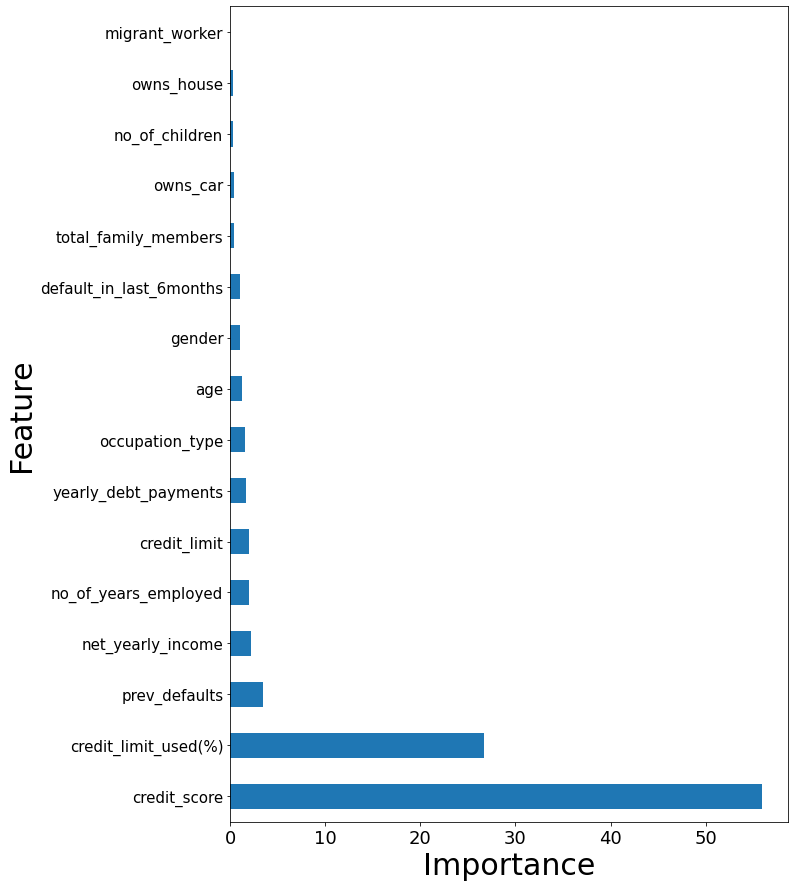

In [96]:
plt.figure(figsize=(10,15))
(pd.Series(model.get_feature_importance(), index=X_test.columns)
   .nlargest(35)
   .plot(kind='barh')) 


plt.xticks(size=18,rotation=0)
plt.yticks(size=15,rotation=0)
plt.xlabel('Importance',fontsize=30)
plt.ylabel('Feature',fontsize=30)
plt.show()

# Prediction on Test data

In [97]:
test = pd.read_csv('test.csv')

In [98]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [99]:
cols = test.columns 

for i in cols:
    if i not in ('customer_id','name'):
        print("Column Name:",i)
        print(test[i].value_counts())
        print("="*50)

Column Name: age
47    392
49    376
36    370
41    367
27    362
25    360
55    359
44    356
51    350
23    349
54    347
24    347
26    346
53    346
31    344
40    343
52    343
46    342
29    342
42    341
37    341
48    339
33    339
30    338
50    336
35    333
45    332
28    329
38    329
43    328
32    323
34    318
39    316
Name: age, dtype: int64
Column Name: gender
F      7443
M      3939
XNA       1
Name: gender, dtype: int64
Column Name: owns_car
N    7372
Y    3879
Name: owns_car, dtype: int64
Column Name: owns_house
Y    7861
N    3522
Name: owns_house, dtype: int64
Column Name: no_of_children
0.0     7825
1.0     2248
2.0      957
3.0      138
4.0       19
5.0        4
7.0        1
11.0       1
Name: no_of_children, dtype: int64
Column Name: net_yearly_income
148537.51    2
105968.50    2
262210.17    2
232640.53    1
159140.73    1
            ..
275512.69    1
133793.07    1
170549.59    1
169661.76    1
158543.43    1
Name: net_yearly_income, Length: 1138

In [100]:
test['gender'].mask(test['gender'] == 'XNA', 'F', inplace=True)

In [101]:
test.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [102]:
test['no_of_children'].fillna(test['no_of_children'].mode()[0], inplace=True)

In [103]:
test['total_family_members'].fillna(test['total_family_members'].mode()[0], inplace=True)

In [104]:
test['migrant_worker'].fillna(test['migrant_worker'].mode()[0], inplace=True)

In [105]:
test['owns_car'].fillna(test['owns_car'].mode()[0], inplace=True)

In [106]:
test['yearly_debt_payments'].fillna(test['yearly_debt_payments'].median(), inplace=True)
test['credit_score'].fillna(test['credit_score'].median(), inplace=True)

In [107]:
test.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 0
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [108]:
test['no_of_years_employed'] = test['no_of_days_employed'].apply(lambda x:x//365) 

In [109]:
test.drop(['no_of_days_employed'],  axis = 1,inplace = True)

In [110]:
test['no_of_years_employed'].fillna(test['no_of_years_employed'].median(), inplace=True)

In [111]:
test.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
no_of_years_employed       0
dtype: int64

In [112]:
final_df = pd.DataFrame(test.customer_id)
test.drop(['customer_id', 'name'], axis=1, inplace=True)
test.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,no_of_years_employed
0,52,F,Y,N,0.0,232640.53,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0,2.0
1,48,F,N,N,1.0,284396.79,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0,3.0
2,50,F,N,N,1.0,149419.28,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0,3.0
3,30,F,N,N,1.0,160437.54,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0,1.0
4,52,M,N,Y,0.0,233480.37,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1,0.0


In [113]:
# get categorical columns
cat_cols_test = test.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols_test:
    test[i] = le.fit_transform(test[i])
    
test.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,no_of_years_employed
0,52,0,1,0,0.0,232640.53,17,2.0,0.0,14406.73,26524.40,4,779.0,0,0,2.0
1,48,0,0,0,1.0,284396.79,17,3.0,0.0,57479.99,68998.72,70,806.0,0,0,3.0
2,50,0,0,0,1.0,149419.28,17,3.0,0.0,21611.01,25187.80,71,528.0,2,0,3.0
3,30,0,0,0,1.0,160437.54,8,2.0,1.0,28990.76,29179.39,9,815.0,0,0,1.0
4,52,1,0,1,0.0,233480.37,8,2.0,1.0,54213.72,82331.82,82,613.0,1,1,0.0


In [114]:
catboost_final_df = pd.DataFrame(final_df['customer_id'])

catboost_predicted_target = model.predict(test)
catboost_predicted_target[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [115]:
catboost_final_df['credit_card_default'] = catboost_predicted_target
catboost_final_df.head()

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1


In [116]:
catboost_final_df.to_csv('CatBoost_Prediction.csv', index=False)
print('Output Saved to CSV File!!')

Output Saved to CSV File!!


In [117]:
import pickle
pickle_out = open('cc.pkl','wb')
pickle.dump(pred,pickle_out)
pickle_out.close()